<a href="https://colab.research.google.com/github/robsmokos/Projekt_Zlozony_v3/blob/main/Projekt_Zlozony_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pobranie utworów wydanych w styczniu 2024
def fetch_tracks_january_2024(year, month, limit=50):
    tracks = []
    for day in range(1, 32):  # Styczeń ma 31 dni
        offset = 0
        query = f"year:{year} month:{month:02d} day:{day:02d}"  # Filtr na rok, miesiąc i dzień
        print(f"\nPobieranie utworów dla daty: {year}-{month:02d}-{day:02d}")

        while True:
            # Pobieranie wyników wyszukiwania
            results = sp.search(q=query, type="track", limit=limit, offset=offset)
            items = results['tracks']['items']
            tracks.extend(items)

            # Wyświetlanie postępu
            print(f"Pobrano {len(items)} wyników (łącznie: {len(tracks)})")

            # Sprawdzenie, czy są kolejne strony wyników
            if len(items) < limit:  # Jeśli mniej wyników niż limit, osiągnięto koniec
                break
            offset += limit  # Przejście do następnej strony

    return tracks

# Wywołanie funkcji dla stycznia 2024
tracks_january_2024 = fetch_tracks_january_2024(2024, 1)

# Wyświetlenie pierwszych 10 wyników
print("\nPierwsze 10 utworów wydanych w styczniu 2024:")
for track in tracks_january_2024[:10]:
    print(f"{track['name']} - {track['artists'][0]['name']}")



Pobieranie utworów dla daty: 2024-01-01
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-02
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-03
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-04
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-05
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-06
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-07
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-08
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-09
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-10
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-11
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-12
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-13
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-14
Pobrano 0 wyników (łącz

# Projekt Złożony podejście_3

Próba pobrania danych bezpośrednio z serwisu SPOTYFY

In [ ]:
pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
# Instalacja wymaganej biblioteki do pobierania danych z Google Drive
!pip install gdown --quiet

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Konfiguracja aplikacji Spotify
CLIENT_ID = "201745d11caf4fbb893a6d738c491d55"
CLIENT_SECRET = "ac3ca7483a0143bf82582d665d03b293"

# Autoryzacja za pomocą Client Credentials
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)


# *** SPRINT 1 ***

1.2 Import danych, analiza stuktury

In [ ]:
# Instalacja wymaganej biblioteki do pobierania danych z Google Drive
!pip install gdown --quiet
# Importowanie wymaganych bibliotek
import gdown
import pandas as pd

In [22]:
# Importowanie wymaganych bibliotek
import gdown
import pandas as pd

# URL do pliku na Google Drive
file_url = "https://drive.google.com/uc?id=15-_Oqh75pSUlg6zwG0hcv7PGfXlINrPI"

# Ścieżka lokalna do zapisu pliku
output_file = "spotify_data.csv"

# Pobranie pliku
gdown.download(file_url, output_file, quiet=False)

# Wczytanie danych do Pandas DataFrame
data = pd.read_csv(output_file, encoding='latin1')

# Wyświetlenie pierwszych kilku wierszy danych
print(data.head())


Downloading...
From: https://drive.google.com/uc?id=15-_Oqh75pSUlg6zwG0hcv7PGfXlINrPI
To: /content/spotify_data.csv
100%|██████████| 20.1M/20.1M [00:00<00:00, 74.7MB/s]


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [23]:
# Analiza struktury bazy danych
def analyze_data_structure(data):
    print("=== ANALIZA STRUKTURY BAZY DANYCH ===\n")

    # Podstawowe informacje o danych
    print("1. Informacje o DataFrame:")
    print(data.info(), "\n")

    # Pierwsze kilka wierszy danych
    print("2. Przykładowe dane (5 pierwszych wierszy):")
    print(data.head(), "\n")

    # Rozmiar danych
    print("3. Liczba wierszy i kolumn:")
    print(f"Wiersze: {data.shape[0]}, Kolumny: {data.shape[1]}\n")

    # Sprawdzenie brakujących wartości
    print("4. Liczba brakujących wartości w każdej kolumnie:")
    print(data.isnull().sum(), "\n")

    # Typy danych w kolumnach
    print("5. Typy danych w kolumnach:")
    print(data.dtypes, "\n")

    # Podstawowe statystyki opisowe dla kolumn numerycznych
    print("6. Statystyki opisowe dla kolumn numerycznych:")
    print(data.describe(), "\n")

    # Unikalne wartości w kolumnach
    print("7. Liczba unikalnych wartości w każdej kolumnie:")
    for col in data.columns:
        print(f"- {col}: {data[col].nunique()} unikalnych wartości")

    # Wywołanie funkcji analizy
analyze_data_structure(data)

=== ANALIZA STRUKTURY BAZY DANYCH ===

1. Informacje o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  in

1.3 uzupełnienie brakujących danych

In [24]:
# Importowanie wymaganych bibliotek
import gdown
import pandas as pd

# URL do pliku na Google Drive
file_url = "https://drive.google.com/uc?id=15-_Oqh75pSUlg6zwG0hcv7PGfXlINrPI"

# Ścieżka lokalna do zapisu pliku
output_file = "spotify_data.csv"

# Pobranie pliku
gdown.download(file_url, output_file, quiet=False)

# Wczytanie danych do Pandas DataFrame
data = pd.read_csv(output_file, encoding='latin1')

# Sprawdzanie brakujących danych
print("Brakujące wartości przed uzupełnieniem:")
print(data.isnull().sum())

# Uzupełnianie brakujących danych:
# - Wartości liczbowe uzupełniane średnią
# - Wartości tekstowe uzupełniane stałą wartością "Unknown"
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  # Dla danych liczbowych
        data[column].fillna(data[column].mean(), inplace=True)
    elif data[column].dtype == 'object':  # Dla danych tekstowych
        data[column].fillna('Unknown', inplace=True)

# Sprawdzanie brakujących danych po uzupełnieniu
print("\nBrakujące wartości po uzupełnieniu:")
print(data.isnull().sum())

# Wyświetlenie kilku pierwszych wierszy danych
print("\nPodgląd danych po uzupełnieniu braków:")
print(data.head())


Downloading...
From: https://drive.google.com/uc?id=15-_Oqh75pSUlg6zwG0hcv7PGfXlINrPI
To: /content/spotify_data.csv
100%|██████████| 20.1M/20.1M [00:00<00:00, 76.0MB/s]


Brakujące wartości przed uzupełnieniem:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Brakujące wartości po uzupełnieniu:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_ge

<ipython-input-24-402481b7343f>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-24-402481b7343f>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

1.4 Analiza rozkładu zmiennych

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Analiza rozkładu zmiennych numerycznych:


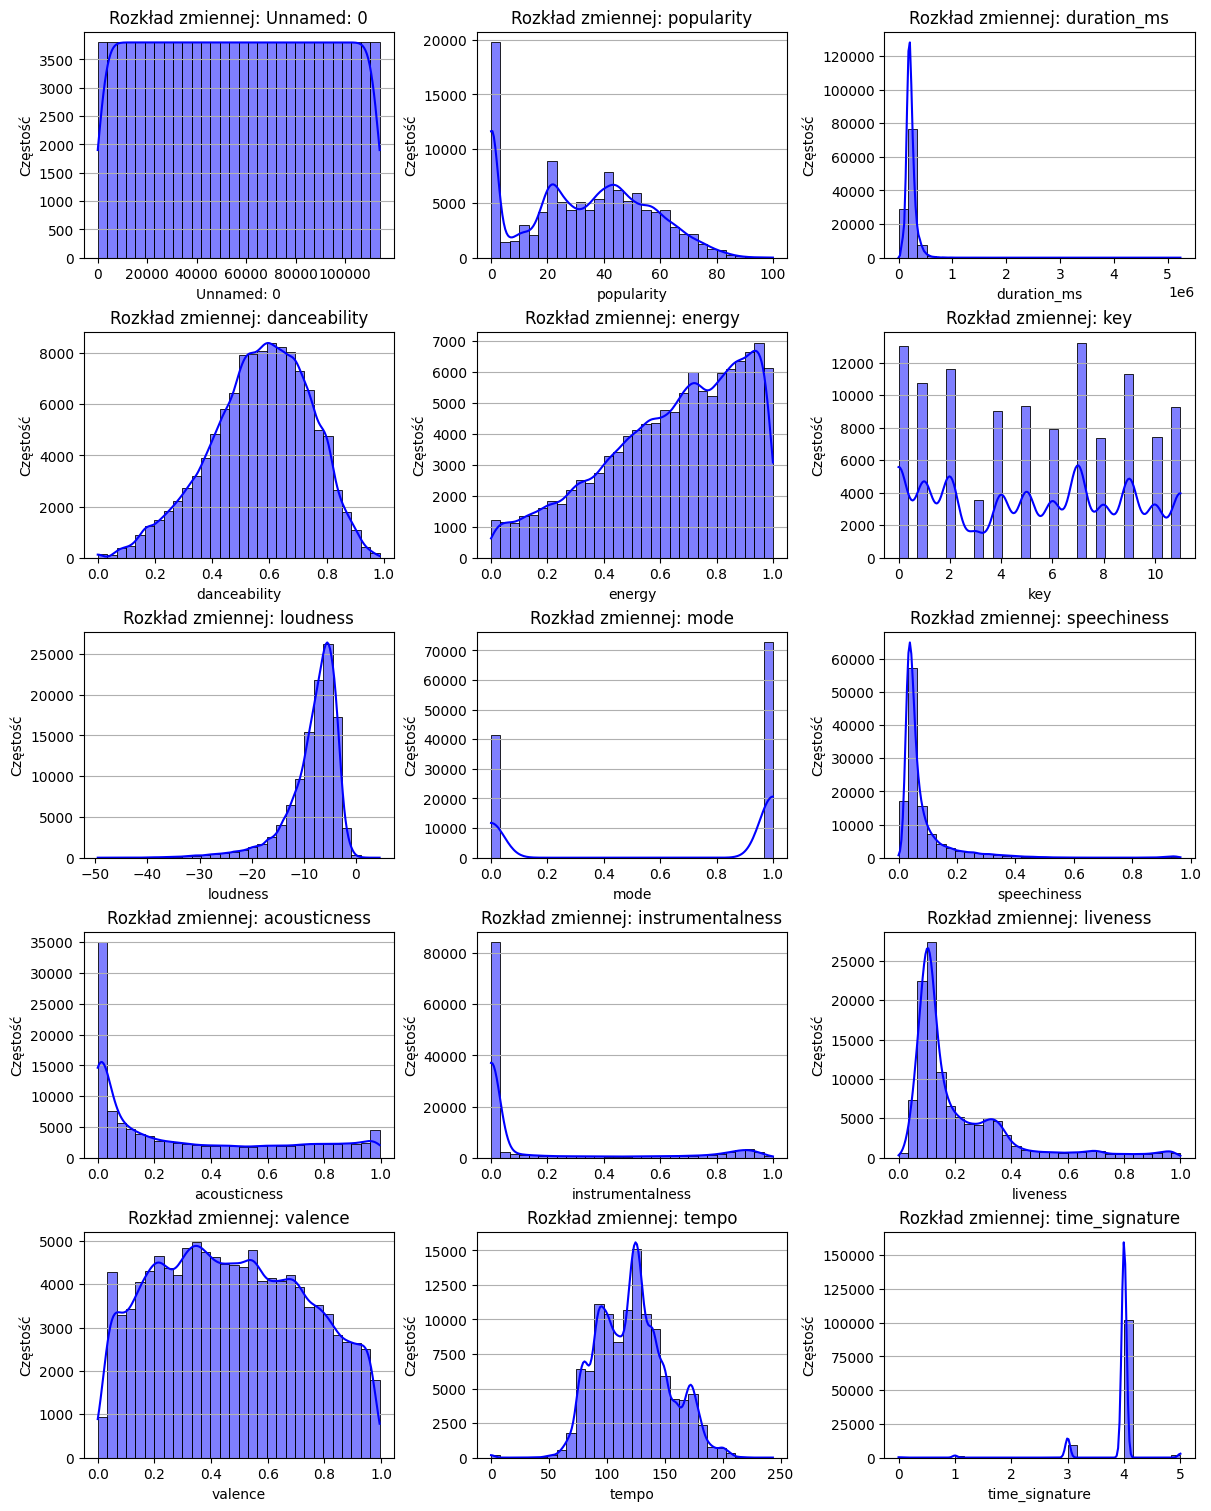


Analiza rozkładu zmiennych kategorycznych:


In [ ]:
# Funkcja do analizy rozkładu zmiennych numerycznych
def analyze_numeric_distribution(df, columns):
    n_cols = 3  # Liczba wykresów w jednym rzędzie
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Obliczanie liczby rzędów
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), constrained_layout=True)

    for i, col in enumerate(columns):
        row, col_idx = divmod(i, n_cols)
        ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
        sns.histplot(df[col], kde=True, bins=30, color='blue', ax=ax)
        ax.set_title(f"Rozkład zmiennej: {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Częstość")
        ax.grid(axis='y')

    # Wyłączanie pustych osi w przypadku brakujących zmiennych
    for i in range(len(columns), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        fig.delaxes(axes[row, col_idx] if n_rows > 1 else axes[col_idx])

    plt.show()

# Funkcja do analizy zmiennych kategorycznych
def analyze_categorical_distribution(df, columns):
    n_cols = 3  # Liczba wykresów w jednym rzędzie
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Obliczanie liczby rzędów
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), constrained_layout=True)

    for i, col in enumerate(columns):
      row, col_idx = divmod(i, n_cols)
      ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
      sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
      ax.set_title(f"Rozkład zmiennej: {col}")
      ax.set_ylabel("Liczba wystąpień")
      ax.set_xlabel("")  # Usunięcie opisu osi x
      ax.set_xticks([])  # Usunięcie wartości osi x
      ax.grid(axis='y')

    # Wyłączanie pustych osi w przypadku brakujących zmiennych
    for i in range(len(columns), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        fig.delaxes(axes[row, col_idx] if n_rows > 1 else axes[col_idx])

    plt.show()

# Wybór zmiennych numerycznych i kategorycznych
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Analiza rozkładu zmiennych numerycznych
print("\nAnaliza rozkładu zmiennych numerycznych:")
analyze_numeric_distribution(data, numeric_columns)

# Analiza rozkładu zmiennych kategorycznych
print("\nAnaliza rozkładu zmiennych kategorycznych:")
analyze_categorical_distribution(data, categorical_columns)

# ** SPRINT 2**